# **Introduction:**

* It has the same idea as we saw in boosting: **Combine weak learners through the use of weighted sum.**

* It works this way:

**Make one tree --> use learning from this tree --> this learning+dataset => Make next tree ---> Goto step 1 again.**

* This is called adaptive because you are adapting findings/result from previous tree to make new tree.

**Adaptive ==> make (something) suitable for a new use or purpose; modify.**


# **AdaBoost Algorithm Steps:**

## **- - - - Step 1: Select 'X'- - - -**

Start with number of samples $x_1, x_2, ..., x_n$. These $x_{i}$'s are the datapoints in our dataset/feature space.

So, if we will have 100 datapoints in our dataset then we will have n = 100.


## **- - - - Step 2: Select 'y'- - - -**

Select the target label/desired outputs $y_1, y_2, ..., y_n$. These predictions must be in the range from -1 to 1. It shows probability of belonging to any class of that datapoint. i.e.

$y_1$ = Probability of datapoint $x_1$ belonging to desired class (class 1) is 0.91 and class 0 is 0.08.

## **- - - - Step 3: Select 'w'- - - -**

Set up initial weights $w_{1,1}, w_{2,1}, ..., w_{n,1}$ for each data point $x_1, x_2, ..., x_n$, respectively.

$w_{n,1}$ means 1st weight setup for nth datapoint.

$w_{5,1}$ means 1st weight setup for 5th datapoint.

Now question is hmen kya pta kya weight assign krna eh?

Answer: Start me sb datapoints ko same weight assign kro = $1/n$.

So, if we have 100 datapoints then each data point will have weight equal to $1/n = 1/100$.

## **- - - - Step 4: Select Error Function- - - -**

$E( f(x), y, i) = e^{-y_i f(x_i)}$

On it, the weights will be trained and updated to minimize it.

## **- - - - Step 5: Weak Learner Result h: x --> {-1, 1} - - - -**

So, we are gonna get a weak learner hypothesis h(x) for all datapoints $X_i$'s. This prediction/result will be in range -1 till 1.

# **How Training works and Weights get updated:**

**1. Train the first learner:** We start by training the first learner using initial weights given to the training examples. The learner tries to minimize the mistakes it makes when classifying the examples like normal algorithm does.

**2. Adjust weights and learner importance:** After the first learner is trained, we adjust the weights of the training examples. We increase the weights of the examples that were classified incorrectly and decrease the weights of the examples that were classified correctly. We also assign **a weight** to the first learner based on how well it performed, indicating its importance in the group.

**3. Train the next learners:** We continue the process by teaching subsequent learners. Each new learner focuses on the examples that were classified incorrectly by the previous learners. The weights of the examples and the importance of the new learners are updated as well.

**4. Combine the learners:** Finally, we combine the predictions of all the learners. Each learner's prediction has a weight that determines its influence. We use weighted voting, where learners with lower error rates are given more importance in the final prediction.

### **Summary:**

In summary, AdaBoost trains a series of learners, each focusing on the mistakes made by the previous learners. It adjusts the weights of the examples and the importance of the learners based on their performance. The final prediction is made by combining the predictions of all the learners using weighted voting.

So, we can say **Adaboost uses an ensemble of weak laerners that learn slowly in series.**

Adaboost uses stumps like this:

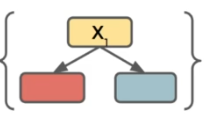

So it considers one feature at a time.

**Building these stumps in series and adding in α parameter allow up to intelligently combine the importance of each feature together.**

Like random forest, adaboost also doens't overfit the model. If we add more trees, it will stop improving like random forest.

# **--------------- Coding -----------------**

Mashroom data:

We have to do 2 tasks in it:

1. Predicting poisoness vs edible mashrooms

2. Create cautionary guidelines for people picking right mashrooms.

Tree based methods have great capabilities to report feature importance.  Adaboost specially focus on one feature at a time which could be useful in creating mashroom picking guidelines.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/content/sample_data/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Almost all features are categorical. All these lettes in them stands for something we can check in feature info. of this dataset.

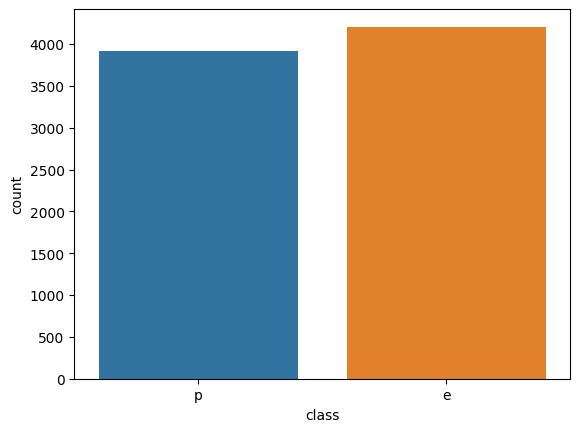

In [4]:
sns.countplot(data = df, x = 'class');

So, more data is of edible mashroom.

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
X = df.drop('class', axis = 1)
y = df['class']

In [7]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

We need to convert them to continous bro.

In [8]:
X = pd.get_dummies(df.drop('class', axis=1), drop_first=True)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [10]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoostClassifier takes **base_estimator** as parameter. If we set it **None**, it will set **max_depth = 1** and it will take only one stump decision tree.

It also has **n_estimators** that shows how many decision trees/weak learners you want.

In [14]:
model  = AdaBoostClassifier(n_estimators = 1)

It means the classifier has to now figure out one best single feature to split on. Definitely it is done with gini impurity/entropy etc. that we do in normal DTs.

In [15]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [16]:
predictions = model.predict(X_test)

In [17]:
predictions

array(['e', 'e', 'e', ..., 'e', 'e', 'p'], dtype=object)

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       0.97      0.80      0.88      1425
           p       0.81      0.97      0.88      1256

    accuracy                           0.88      2681
   macro avg       0.89      0.89      0.88      2681
weighted avg       0.90      0.88      0.88      2681



Good performance even with single feature.

In [19]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
model.feature_importances_.argmax()

22

In [21]:
X.columns[22]

'odor_n'

So, it has split on base of feature 'odor_n' of mashroom to decide if its poisoness or edible.

Let's improve the performance by adding more weak learners.

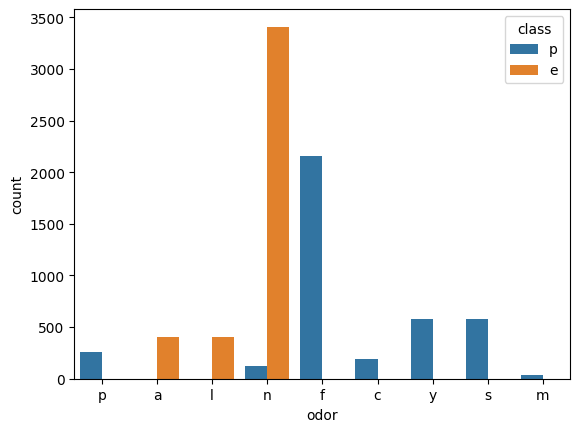

In [27]:
sns.countplot(data = df, x='odor', hue = 'class');

So, we can setup the guideline that **go and pick mashroom then smell it. If it has no odor, it is edible.**

Let's ensemble many weak learners.

In [28]:
len(X.columns)

95

95 features means we can make 95 stumps at max.

In [30]:
from sklearn.metrics import accuracy_score

error_rate = []

for n in range(1, 96):
  model  = AdaBoostClassifier(n_estimators = n)
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)

  error = 1 - accuracy_score(y_test, predictions)

  error_rate.append(error)

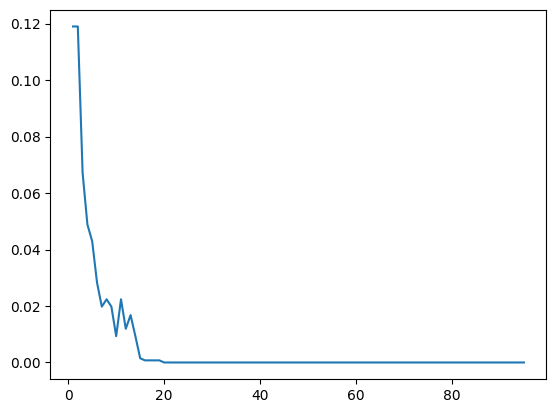

In [31]:
plt.plot(range(1,96), error_rate)

We can see after 20th stump, it stops reducing error.

Let's see which features are important.

In [32]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.02105263, 0.        , 0.        , 0.04210526, 0.03157895,
       0.        , 0.        , 0.05263158, 0.03157895, 0.        ,
       0.        , 0.        , 0.08421053, 0.09473684, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04210526, 0.01052632, 0.        , 0.        , 0.        ,
       0.04210526, 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05263158, 0.01052632, 0.        ,
       0.01052632, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03157895, 0.01052632, 0.        , 0.     

Ugh. Let's set it.

In [34]:
pd.DataFrame(data = model.feature_importances_,  index = X.columns, columns = ['Feature Importance']).sort_values(by = 'Feature Importance', ascending = False)

,Feature Importance
spore-print-color_w,0.094737
gill-size_n,0.094737
gill-spacing_w,0.084211
population_c,0.073684
stalk-color-below-ring_n,0.052632
...,...
gill-color_p,0.000000
gill-color_o,0.000000
gill-color_n,0.000000
gill-color_k,0.000000


Ughh. Get only who are > 0.

In [35]:
feats = pd.DataFrame(data = model.feature_importances_,  index = X.columns, columns = ['Feature Importance']).sort_values(by = 'Feature Importance', ascending = False)

imp_feats = feats[feats['Feature Importance'] > 0]

imp_feats

,Feature Importance
spore-print-color_w,0.094737
gill-size_n,0.094737
gill-spacing_w,0.084211
population_c,0.073684
stalk-color-below-ring_n,0.052632
odor_n,0.052632
stalk-surface-above-ring_k,0.042105
stalk-shape_t,0.042105
spore-print-color_r,0.042105
odor_c,0.042105


To visualize it:

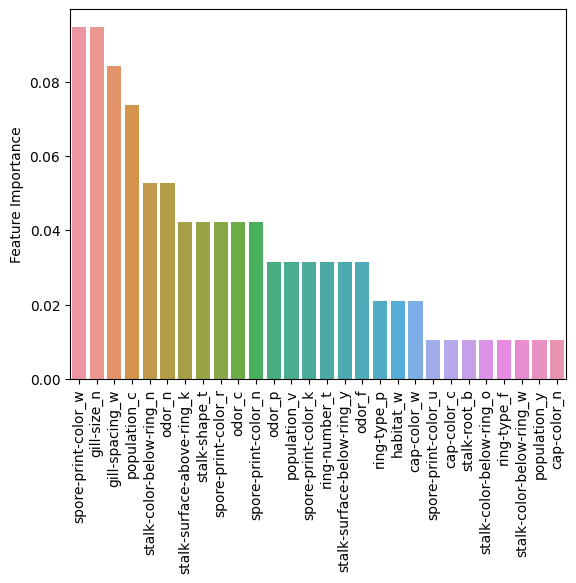

In [37]:
sns.barplot(data = imp_feats, x = imp_feats.index, y = 'Feature Importance')
plt.xticks(rotation=90);